In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.2.3


In [4]:
exam_data = pd.read_csv(r'C:\Users\jespe\Downloads\exams.csv', quotechar='"')
exam_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,none,95,86,97
1,male,group C,associate's degree,standard,completed,92,100,100
2,female,group C,associate's degree,free/reduced,none,68,89,87
3,female,group D,bachelor's degree,standard,none,78,84,85
4,male,group B,some college,standard,none,53,39,38
...,...,...,...,...,...,...,...,...
95,female,group B,bachelor's degree,standard,none,74,81,78
96,male,group C,some college,standard,none,66,53,48
97,female,group C,some high school,standard,none,73,83,81
98,male,group B,master's degree,free/reduced,completed,85,95,93


In [5]:
math_avg = exam_data['math score'].mean()
read_avg = exam_data['reading score'].mean()
wrt_avg = exam_data['writing score'].mean()

print('math avg: ', math_avg)
print('read avg: ', read_avg)
print('write avg: ', wrt_avg)

math avg:  66.03
read avg:  69.18
write avg:  68.3


In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()

In [11]:
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))

In [12]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group D,some college,standard,none,95,86,97
1,1,group C,associate's degree,standard,completed,92,100,100
2,0,group C,associate's degree,free/reduced,none,68,89,87
3,0,group D,bachelor's degree,standard,none,78,84,85
4,1,group B,some college,standard,none,53,39,38


In [13]:
le.classes_

array(['female', 'male'], dtype=object)

In [15]:
pd.get_dummies(exam_data['race/ethnicity'])

,group A,group B,group C,group D,group E
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
95,0,1,0,0,0
96,0,0,1,0,0
97,0,0,1,0,0
98,0,1,0,0,0


# sklearn

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
corpus = [
    'This is the first doCument',
    'This is the second document',
    'Third document. Document number three',
    'Number four. To repeat, number four'
]

In [28]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)
bag_of_words

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [29]:
print(bag_of_words)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 0)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 0)	1
  (1, 6)	1
  (2, 0)	2
  (2, 8)	1
  (2, 4)	1
  (2, 10)	1
  (3, 4)	2
  (3, 2)	2
  (3, 11)	1
  (3, 5)	1


In [30]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [31]:
pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,1,1,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0
3,0,0,2,0,2,1,0,0,0,0,0,1


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)

In [39]:
print(bag_of_words)

  (0, 0)	0.3528554929793508
  (0, 1)	0.5528163151092931
  (0, 7)	0.43584673254990375
  (0, 3)	0.43584673254990375
  (0, 9)	0.43584673254990375
  (1, 6)	0.5528163151092931
  (1, 0)	0.3528554929793508
  (1, 7)	0.43584673254990375
  (1, 3)	0.43584673254990375
  (1, 9)	0.43584673254990375
  (2, 10)	0.4850008395708102
  (2, 4)	0.3823802326982809
  (2, 8)	0.4850008395708102
  (2, 0)	0.6191395067937654
  (3, 5)	0.3432724906138499
  (3, 11)	0.3432724906138499
  (3, 2)	0.6865449812276998
  (3, 4)	0.5412799489419371


In [40]:
vectorizer.vocabulary_.get('document')

0

In [42]:
pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,0.352855,0.552816,0.000000,0.435847,0.00000,0.000000,0.000000,0.435847,0.000000,0.435847,0.000000,0.000000
1,0.352855,0.000000,0.000000,0.435847,0.00000,0.000000,0.552816,0.435847,0.000000,0.435847,0.000000,0.000000
2,0.619140,0.000000,0.000000,0.000000,0.38238,0.000000,0.000000,0.000000,0.485001,0.000000,0.485001,0.000000
3,0.000000,0.000000,0.686545,0.000000,0.54128,0.343272,0.000000,0.000000,0.000000,0.000000,0.000000,0.343272


In [43]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [46]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=8)
feature_vector = vectorizer.fit_transform(corpus)
print(feature_vector)

  (0, 0)	-0.8944271909999159
  (0, 5)	0.4472135954999579
  (0, 6)	0.0
  (1, 0)	-0.5773502691896258
  (1, 3)	0.5773502691896258
  (1, 5)	0.5773502691896258
  (1, 6)	0.0
  (2, 0)	-0.7559289460184544
  (2, 3)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (2, 7)	0.3779644730092272
  (3, 0)	0.31622776601683794
  (3, 3)	0.31622776601683794
  (3, 5)	0.6324555320336759
  (3, 7)	0.6324555320336759


# OpenCV

In [50]:
import cv2

In [54]:
imagePath = r'C:\Users\jespe\Downloads\dog.jpg'

image = cv2.imread(imagePath)

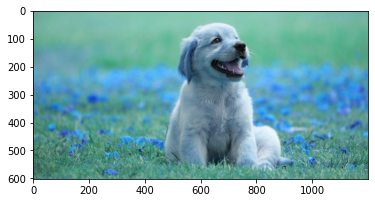

In [55]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.imshow(image)

In [56]:
image.shape

(602, 1200, 3)

In [57]:
image

array([[[107, 170, 154],
        [107, 170, 154],
        [107, 170, 154],
        ...,
        [110, 174, 168],
        [110, 174, 168],
        [110, 174, 168]],

       [[107, 170, 154],
        [107, 170, 154],
        [107, 170, 154],
        ...,
        [110, 174, 168],
        [110, 174, 168],
        [110, 174, 168]],

       [[107, 170, 154],
        [107, 170, 154],
        [106, 169, 153],
        ...,
        [110, 174, 168],
        [110, 174, 168],
        [110, 174, 168]],

       ...,

       [[ 57, 131, 107],
        [ 60, 134, 110],
        [ 64, 136, 114],
        ...,
        [ 69, 138, 117],
        [ 74, 137, 117],
        [ 76, 137, 117]],

       [[ 56, 131, 109],
        [ 57, 130, 108],
        [ 59, 130, 110],
        ...,
        [ 65, 134, 113],
        [ 72, 137, 116],
        [ 77, 140, 120]],

       [[ 56, 131, 109],
        [ 55, 130, 108],
        [ 59, 130, 110],
        ...,
        [ 65, 134, 113],
        [ 71, 136, 115],
        [ 76, 139, 119]]

In [58]:
image[0][0]

array([107, 170, 154], dtype=uint8)

In [61]:
size=(32, 32)
resized_image_feature_vector = cv2.resize(image, size)

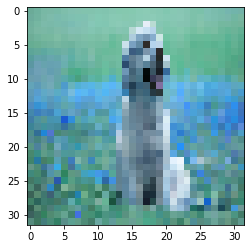

In [62]:
plt.imshow(resized_image_feature_vector)

In [64]:
resized_flattened_image_feature_vector = resized_image_feature_vector.flatten()

In [65]:
resized_flattened_image_feature_vector

array([107, 171, 152, ...,  95, 153, 142], dtype=uint8)

In [67]:
len(resized_flattened_image_feature_vector)

3072

In [69]:
img_grayscale = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

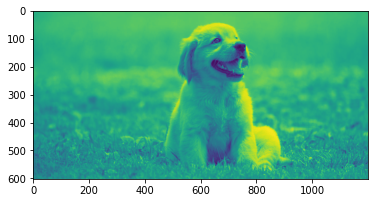

In [70]:
plt.imshow(img_grayscale)

In [71]:
img_grayscale.shape

(602, 1200)

In [74]:
import numpy as np

expanded_image_grayscale = np.expand_dims(img_grayscale, axis=2)
expanded_image_grayscale.shape

(602, 1200, 1)

In [75]:
expanded_image_grayscale

array([[[158],
        [158],
        [158],
        ...,
        [165],
        [165],
        [165]],

       [[158],
        [158],
        [158],
        ...,
        [165],
        [165],
        [165]],

       [[158],
        [158],
        [157],
        ...,
        [165],
        [165],
        [165]],

       ...,

       [[115],
        [118],
        [121],
        ...,
        [124],
        [124],
        [124]],

       [[116],
        [115],
        [116],
        ...,
        [120],
        [123],
        [127]],

       [[116],
        [115],
        [116],
        ...,
        [120],
        [122],
        [126]]], dtype=uint8)

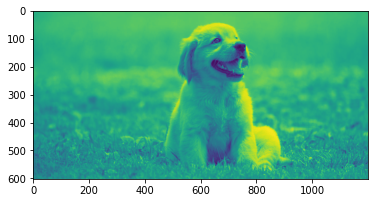

In [76]:
plt.imshow(expanded_image_grayscale)

# auto_data

In [188]:
auto_data = pd.read_csv(r'C:\Users\jespe\Downloads\imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,radio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [189]:
auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,radio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [190]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,radio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,6692
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [191]:
auto_data['price'].describe()

count      201
unique     186
top       6692
freq         2
Name: price, dtype: object

In [192]:
auto_data["price"] = pd.to_numeric(auto_data['price'], errors='coerce')

In [193]:
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [194]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,lenght,...,engine-size,fuel-system,bore,stroke,radio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [195]:
auto_data.describe()

,symboling,wheel-base,lenght,?,?.1,?.2,engine-size,radio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [206]:
auto_data["horsepower"] = pd.to_numeric(auto_data['horsepower'], errors='coerce')

In [207]:
auto_data['horsepower'].describe()

count    195.000000
mean     103.271795
std       37.869730
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In [208]:
cylinders_dict = {
    'two' : 2,
    'three' : 3,
    'four' : 4,
    'five' : 5,
    'six' : 6,
    'eight' : 8,
    'twelve' : 12}

auto_data['num-of-cylinders'].replace(cylinders_dict, inplace=True)

auto_data.head()

,symboling,wheel-base,lenght,?,?.1,?.2,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [209]:
auto_data = pd.get_dummies(auto_data,
                          columns=[
                              'make',
                              'fuel-type',
                              'aspiration',
                              'num-of-doors',
                              'body-style',
                              'drive-wheels',
                              'engine-location',
                              'engine-type',
                              'fuel-system',
                                  ])
auto_data.head()

KeyError: "None of [Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',\n       'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'],\n      dtype='object')] are in the [columns]"

In [210]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,lenght,?,?.1,?.2,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [211]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,lenght,?,?.1,?.2,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [212]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)
Y = auto_data['price']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [215]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [216]:
linear_model.score(X_train, Y_train)

0.967922737092433

In [217]:
linear_model.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  5.45696821e-12,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

In [219]:
predictors = X_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


In [220]:
y_predict = linear_model.predict(x_test)

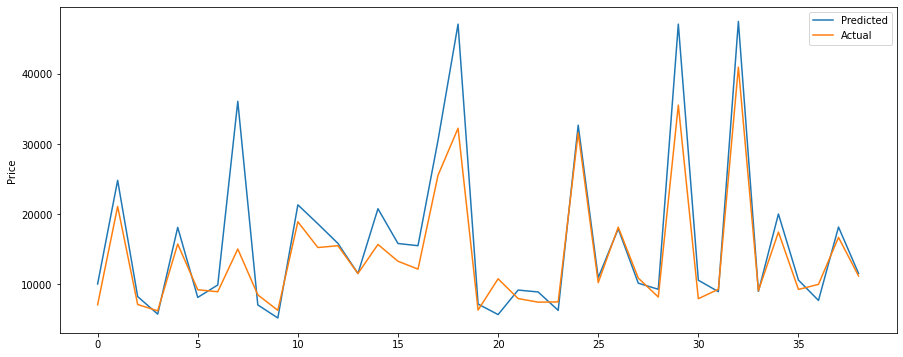

In [222]:

pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [224]:
r_square = linear_model.score(x_test, y_test)
r_square

0.632258341611356

In [228]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

26099937.604365386

In [230]:
import math

math.sqrt(linear_model_mse)

5108.809803111229

# Measure Distance

In [252]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=4, normalize=True)
lasso_model.fit(X_train, Y_train)

Lasso(alpha=4, normalize=True)

In [253]:
lasso_model.score(X_train, Y_train)

0.9513029874181964

In [254]:
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
print(coef)

engine-location_front    -7286.402092
bore                     -2751.067774
engine-type_ohcv         -1613.260672
aspiration_std           -1494.546045
fuel-system_mfi          -1148.246392
                             ...     
make_saab                 2937.675381
body-style_convertible    3241.806182
make_porsche              6792.208585
make_mercedes-benz        7670.491554
make_bmw                  8801.670987
Length: 68, dtype: float64


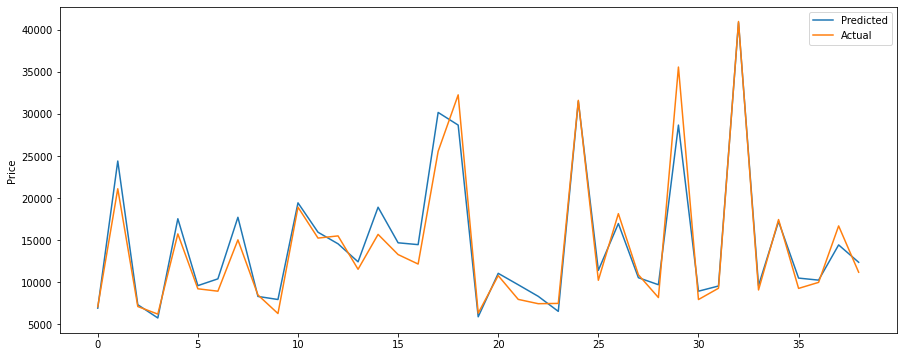

In [255]:
y_predict = lasso_model.predict(x_test)

pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [256]:
r_square = lasso_model.score(x_test, y_test)
r_square

0.946595223577249

In [257]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

1946.876352488216

## Ridge

In [282]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.7, normalize=True)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.7, normalize=True)

In [283]:
coef = pd.Series(ridge_model.coef_, predictors).sort_values()
print(coef)

engine-location_front    -3760.241507
make_isuzu               -1565.099833
make_peugot              -1232.880335
make_mercury             -1128.467819
make_subaru              -1066.065999
                             ...     
body-style_convertible    2002.615354
make_porsche              3551.011884
engine-location_rear      3760.241507
make_bmw                  4633.799019
make_mercedes-benz        4967.269623
Length: 68, dtype: float64


In [284]:
ridge_model.score(X_train, Y_train)

0.9173208284433004

In [285]:
y_predict = ridge_model.predict(x_test)

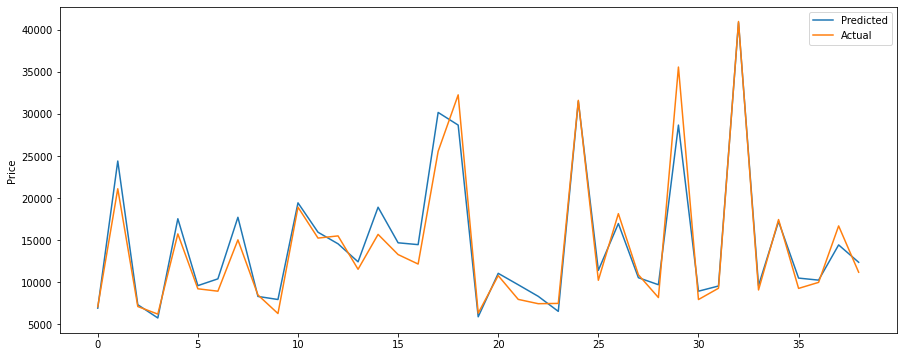

In [286]:
y_predict = lasso_model.predict(x_test)

pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [287]:
r_square = ridge_model.score(x_test, y_test)
r_square


0.9169507185521065

In [281]:

ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

1946.876352488216

# SVR

In [325]:
auto_data = pd.read_csv(r'C:\Users\jespe\Downloads\auto-mpg.data', delim_whitespace = True, header=None,
                       names = ['mpg',
                               'cylinders',
                               'displacement',
                               'horsepower',
                               'weight',
                               'acceleration',
                               'model',
                               'origin',
                               'car_name',])
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [326]:
len(auto_data['car_name'].unique())

305

In [327]:
len(auto_data)

398

In [328]:
auto_data = auto_data.drop('car_name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [329]:
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2:'europe', 3:'asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


In [330]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [331]:
auto_data = auto_data.replace('?', np.nan)

In [332]:
auto_data = auto_data.dropna()
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.00,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,0,0


In [333]:
X = auto_data.drop('mpg', axis=1)

Y = auto_data['mpg']

X_train, x_train, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [334]:
from sklearn.svm import SVR
regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(kernel='linear')

In [335]:
regression_model.coef_

array([[-0.65131731,  0.10313732, -0.16190965, -0.00896875,  0.4332911 ,
         0.85408954, -1.85266565,  0.70061963,  1.15204602]])

In [336]:
 regression_model.score(X_train, Y_train)

0.6193757170869002

<AxesSubplot:title={'center':'Modal Coefficients'}>

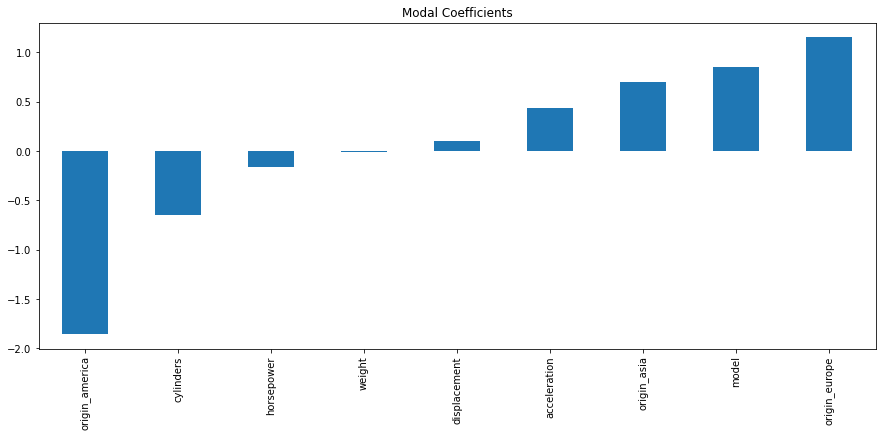

In [337]:
predictors = X_train.columns
coef = pd.Series(regression_model.coef_[0], predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [338]:
y_predict = regression_model.predict(x_test)


ValueError: X.shape[1] = 68 should be equal to 9, the number of features at training time

In [ ]:

pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [339]:
regression_model.score(x_test, y_test)

ValueError: X.shape[1] = 68 should be equal to 9, the number of features at training time

In [341]:
regression_model = SVR(kernel='linear', C=0.5)
regression_model.fit(X_train, Y_train)

SVR(C=0.5, kernel='linear')

In [342]:
regression_model.score(X_train, Y_train)

0.8087716316091305

# SVM
suport vector model

In [350]:
from sklearn.datasets import fetch_20newsgroups

In [351]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [352]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [353]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [354]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [355]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [364]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [365]:
print(X_train_counts[0])

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


In [373]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [384]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(dual=False, tol=1e-3)
clf_svc.fit(X_train_tfidf, twenty_train.target)

LinearSVC(dual=False, tol=0.001)

In [400]:
from sklearn.pipeline import Pipeline

clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(penalty='l1',dual=False, tol=1e-3))
])

In [401]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(dual=False, penalty='l1', tol=0.001))])

In [402]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [403]:
predicted = clf_svc_pipeline.predict(twenty_test.data)

In [404]:
from sklearn.metrics import accuracy_score

acc_svm = accuracy_score(twenty_test.target, predicted)

In [405]:
acc_svm

0.8147902283590016

In [406]:
clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(penalty='l2',dual=False, tol=1e-3))
])

In [409]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)
predicted = clf_svc_pipeline.predict(twenty_test.data)

acc_svm = accuracy_score(twenty_test.target, predicted)
acc_svm

0.7973977695167286

# MNIST

In [411]:
import requests

In [412]:

mnist_data = pd.read_csv(requests.get("www.kaggle.com/c/3004/download/train.csv"))

MissingSchema: Invalid URL 'www.kaggle.com/c/3004/download/train.csv': No schema supplied. Perhaps you meant http://www.kaggle.com/c/3004/download/train.csv?